# Gradient Descent

## Overview

Both polynomial and exponential curve fitting admit best-fit least squares solutions [2]. However, these are specialized cases. Thus a more general framework is needed. In this post, we discuss the <a href="https://en.wikipedia.org/wiki/Gradient_descent"> gradient descent</a> algorithm also known as steepest descent.

## Gradient Descent

Consider the following function [1]

$$f(\theta_1, \theta_2) = \frac{1}{2}(\theta_{1}^2 - \theta_2)^2 + \frac{1}{2}(\theta_1 -1)^2$$

The gradient of the function $\nabla f$ is given by

$$\nabla f = (2(\theta_{1}^2 - \theta_2)\theta_1 +(\theta_1 - 1), -(\theta_{1}^2 - \theta_2))$$

The gradient gives the direction of steepest descent towards the minimum point of $f$ [2]. The minimum point is located in the direction $-\nabla f$. 

We are interested in finding $\theta_1, \theta_2$ that minimize $f$. Gradient descent is an iterative algorithm that uses the gradient of the function in order to update the parameters. The update rule is [1, 2]

$$\boldsymbol{\theta}_k = \boldsymbol{\theta}_{k-1} - \eta \nabla f|_{\boldsymbol{\theta}_{k-1}} $$

$\eta$ is the so called learning rate and tunes how fast we move to the direction of the gradient. A small $\eta$ slows down convergence whilst a large value may not allow convergence of the algorithm. This is shown in the two figures below: 

![](my_icons/gd_1.png)
*Figure 1. Gradient descent with eta 0.1.*

![](my_icons/gd_2.png)
*Figure 2. Gradient descent with eta 0.6.*

The code below is a simple implementation of the gradient descent algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def f(theta1, theta2):
    return 0.5*(theta1**2 - theta2)**2 + 0.5*(theta1 -1.0)**2

In [10]:
def f_grad(theta1, theta2):
    return (2.0*theta1*(theta1**2 - theta2) + (theta1 - 1.0), -(theta1**2 - theta2))

In [11]:
def gd(eta, itrs, tol):
    
    
    coeffs_series = []
    coeffs = [0.0, 0.0]
    
    coeffs_series.append([coeffs[0], coeffs[1]])

    val_old = f(theta1=coeffs[0], theta2=coeffs[1])
    
    for itr in range(itrs):
        
        grad = f_grad(theta1=coeffs[0], theta2=coeffs[1])
        
        coeffs[0] -= eta*grad[0]
        coeffs[1] -= eta*grad[1]
        
        coeffs_series.append([coeffs[0], coeffs[1]])
        
        val = f(theta1=coeffs[0], theta2=coeffs[1])
        
        abs_error = np.abs(val - val_old)
        
        if itr % 10 == 0:
            print(">Iteration {0} absolute error {1} exit tolerance {2}".format(itr, abs_error, tol))
        
        if abs_error < tol:
            print(">GD converged with residual {0}".format(np.abs(val - val_old)))
            return coeffs_series
        
        val_old = val
    return coeffs_series

In [12]:
coeffs_series = gd(eta=0.1, itrs=100, tol=1.0e-4)

>Iteration 0 absolute error 0.09494999999999998 exit tolerance 0.0001
>Iteration 10 absolute error 0.007786932467621618 exit tolerance 0.0001
>Iteration 20 absolute error 0.0033734842877468432 exit tolerance 0.0001
>Iteration 30 absolute error 0.0017811992002927796 exit tolerance 0.0001
>Iteration 40 absolute error 0.001019816407902937 exit tolerance 0.0001
>Iteration 50 absolute error 0.0006153302829237615 exit tolerance 0.0001
>Iteration 60 absolute error 0.00038497166087553616 exit tolerance 0.0001
>Iteration 70 absolute error 0.0002472394968245067 exit tolerance 0.0001
>Iteration 80 absolute error 0.0001619172164950512 exit tolerance 0.0001
>Iteration 90 absolute error 0.00010763619875779401 exit tolerance 0.0001
>GD converged with residual 9.934284762933097e-05


In [13]:
coeffs_x = []
coeffs_y = []
for item in coeffs_series:
    
    coeffs_x.append(item[0])
    coeffs_y.append(item[1])

In [14]:
theta1 = np.linspace(0.0, 2.0, 100)
theta2 = np.linspace(-0.5, 3.0, 100)

In [15]:
X, Y = np.meshgrid(theta1, theta2)

In [16]:
Z = f(X, Y)

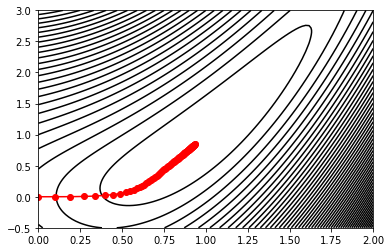

In [17]:
plt.contour(X, Y, Z, 60, colors='black');
plt.plot(coeffs_x, coeffs_y, 'r-o')
plt.show()

## Summary

There are various flavours of the algorithm. Stochastic gradient descent or SGD introduces an element of randmness by using one data
point at a time for a single step and uses a much smaller subset of data points. Nevertheless, SGD is able to reach an unbiased estimate
of the true gradietn. Batch gradient descent BGD uses a fixed batch of data points in each step. It may be very useful when the 
whole dataset does not fit the RAM. So GD uses the entire dataset to do the updates whilst SGD uses just one point. In the middle
of these two extremes sits BGD.

## <a name="refs"></a> References

1. Kevin P. Murphy, _Machine learning a probabilistic perspective_, The MIT Press
2. Steven L. Brunton and J. Nathan Kutz, _Data-driven science and engineering. Machine learning, dynamical systems and control_, Cambridge University Press.